PROJECT 04-02 灰度图像边缘检测的算法实验

In [16]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
root_path = '/root/DIVP_project/'
image_path_blocks = "project04/proj04-images/building_original.tif"
image_path_airport = "project04/proj04-images/marion_airport.tif"
image_path_fingerprint = "project04/proj04-images/noisy_fingerprint.tif"
image_path_defective = "project04/proj04-images/defective_weld.tif"
image_path_yeast = "project04/proj04-images/yeast_USC.tif"

In [18]:
image_yeast = cv2.imread(root_path + image_path_yeast, cv2.IMREAD_GRAYSCALE)
image_yeast_binary = cv2.threshold(image_yeast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

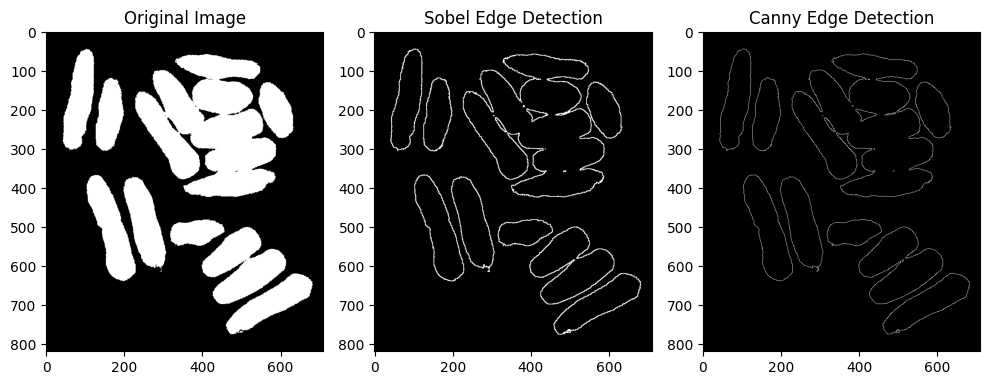

In [19]:
def sobel_edge_detection(image):
    """
    使用 Sobel 算子进行边缘检测。
    参数:
        image: 输入的灰度图像
    返回:
        edges: Sobel 边缘图像
    """
    # Sobel X 和 Sobel Y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # 计算梯度幅值
    edges = cv2.magnitude(sobel_x, sobel_y)
    edges = cv2.convertScaleAbs(edges)  # 转换为 8 位图像

    return edges

# 示例用法
image = image_yeast_binary.copy()
if image is None:
    print("图像加载失败，请检查路径")
    exit()

sobel_edges = sobel_edge_detection(image)

edges = cv2.Canny(image, 50, 150)

# 显示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')


plt.subplot(1, 3, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

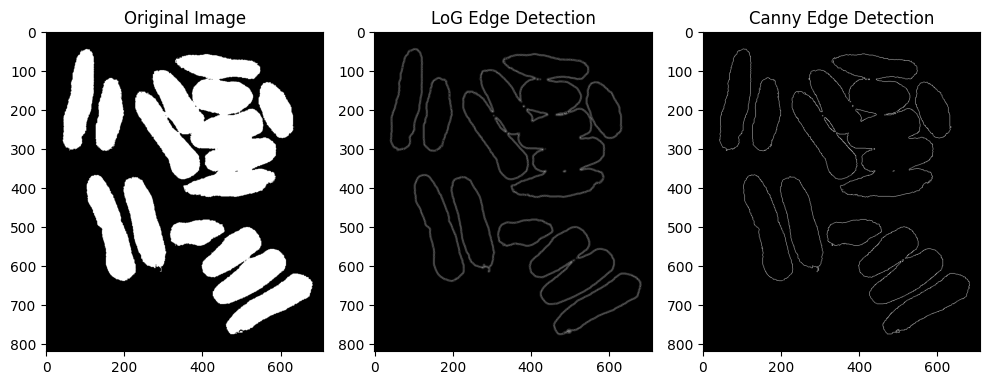

In [20]:
def log_edge_detection(image, ksize=5):
    """
    使用 LoG 算子进行边缘检测。
    参数:
        image: 输入的灰度图像
        ksize: 高斯滤波器的大小
    返回:
        edges: LoG 边缘图像
    """
    # 1. 高斯模糊降噪
    blurred = cv2.GaussianBlur(image, (ksize, ksize), 0)

    # 2. 使用拉普拉斯算子检测边缘
    log_edges = cv2.Laplacian(blurred, cv2.CV_64F)

    # 转换为 8 位图像
    edges = cv2.convertScaleAbs(log_edges)

    return edges

image = image_yeast_binary.copy()
# 示例用法
log_edges = log_edge_detection(image)

edges = cv2.Canny(image, 50, 150)

# 显示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("LoG Edge Detection")
plt.imshow(log_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')


plt.tight_layout()
plt.show()